In [2]:
import pywt

import imageio as io
import numpy as np
import matplotlib.pyplot as plt

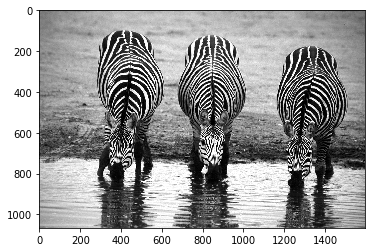

In [60]:
testImg = io.imread('./zebras.jpg')
#testImg = io.imread('./wave.jpg')
# https://commons.wikimedia.org/wiki/Zebra#/media/File:Three_Zebras_Drinking.jpg
testImg = testImg[:,:,2]
#(help(pywt.dwt2)
plt.figure()
plt.imshow(testImg,cmap='gray')
plt.show()

(1063, 1596)


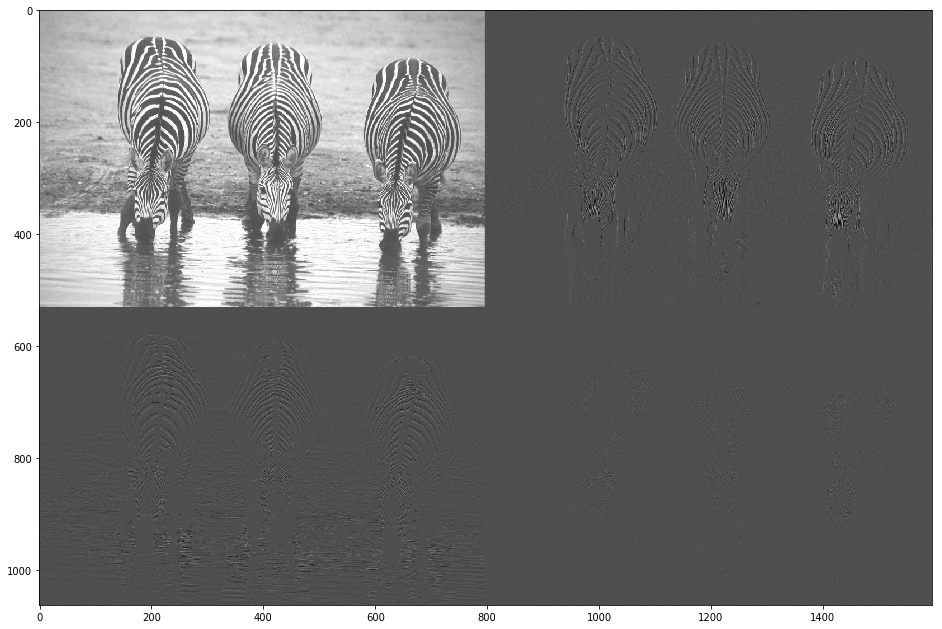

In [62]:
def waveletCoConcat(cA,cH,cV,cD,axisP=0):
    #cA, cH, cV, cD = cA[1:cA.shape[0],1:cA.shape[1]],cH[1:cH.shape[0],1:cH.shape[1]],\
    #cV[1:cV.shape[0],1:cV.shape[1]],cD[1:cD.shape[0],1:cD.shape[1]],
    for c in [cA,cH,cV,cD]:
        c = (c)/np.max(c)
        c = c - np.mean(c)
        
    myImg = np.append(cA,cV,axis=1+axisP)
    myImg2 = np.append(cH,cD,axis=1+axisP)
    myImg = np.append(myImg,myImg2,axis=0+axisP)
    if (axisP):
         return myImg[:,2:myImg.shape[axisP]-1,2:myImg.shape[1+axisP]]
    else:
        return myImg[2:myImg.shape[axisP]-1,2:myImg.shape[1+axisP]]

[cA3, [cH3,cV3,cD3]] = pywt.dwt2(testImg,'db1')

myWP = waveletCoConcat(cA3,cH3,cV3,cD3)

plt.figure(figsize=(16,16))
plt.imshow((myWP),cmap='gray')
print(myWP.shape)
plt.show()

In [139]:
atrousResults = np.load('./output/emTestDataMDAC.npy')
FCNNResults = np.load('./output/coelTestDatafullyCNN.npy')
UNetResults = np.load('./output/emTestDataUNet.npy')
origImg = np.load('../datasets/epflTestX.npy')

origImg = origImg[0:100,:,:]


print(atrousResults.shape)
atrousResults = atrousResults[:,:,:,0]
FCNNResults = FCNNResults[:,:,:,0]
UNetResults = UNetResults[:,:,:,0]
print(atrousResults.shape)
print(np.min(FCNNResults))

(100, 256, 256, 1)
(100, 256, 256)
0.14773475


(253, 254)


<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

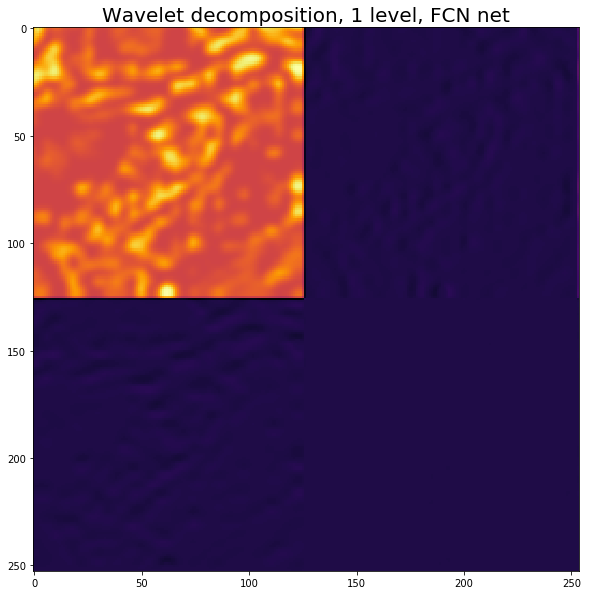

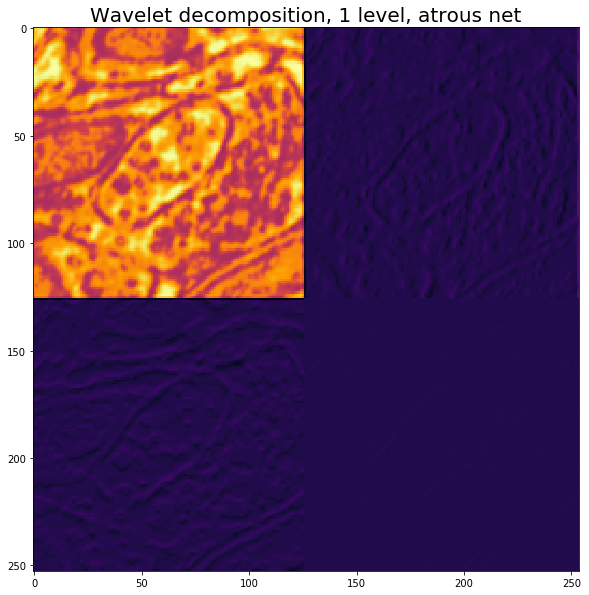

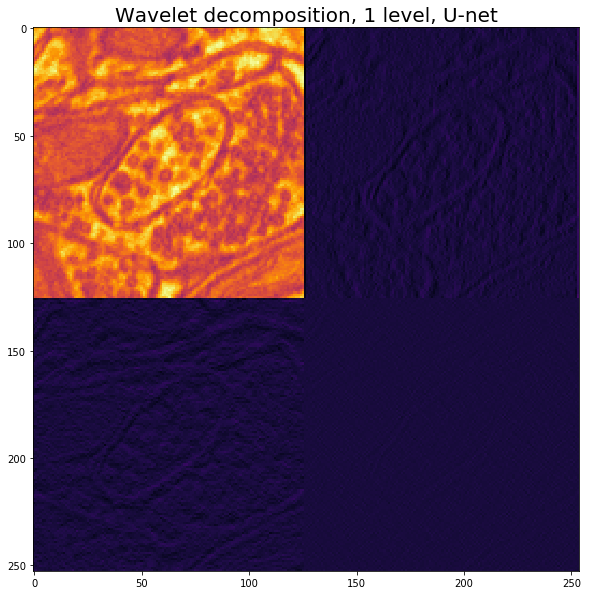

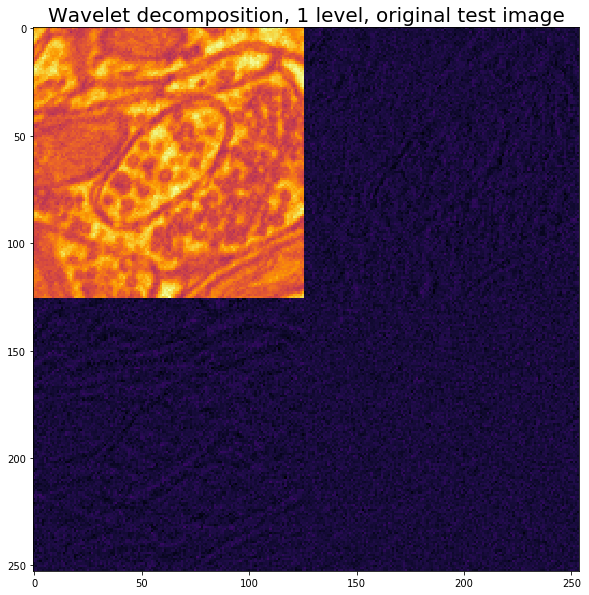

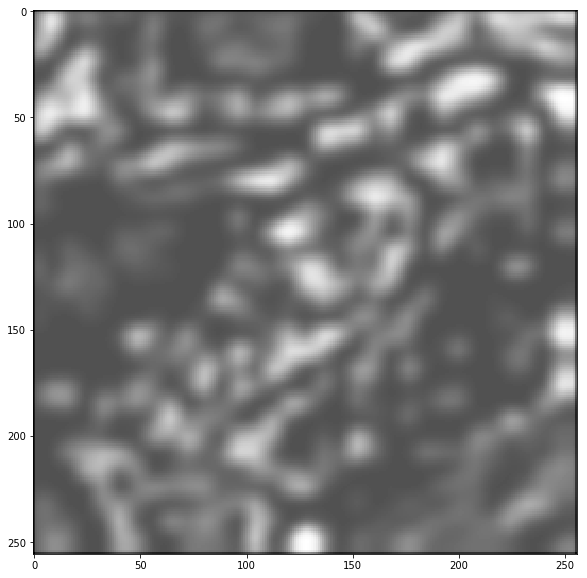

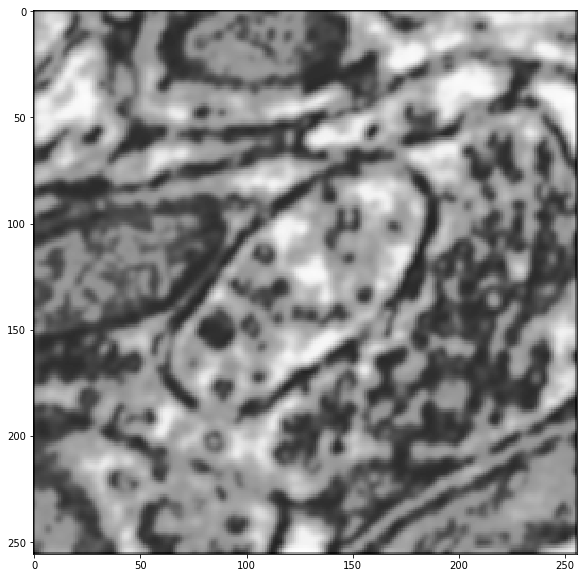

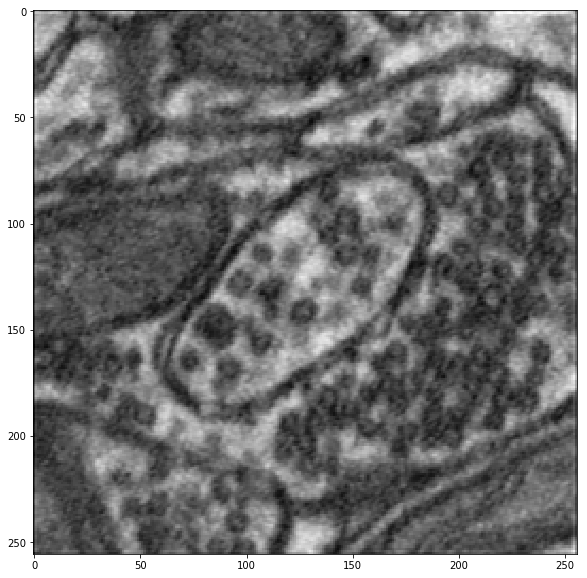

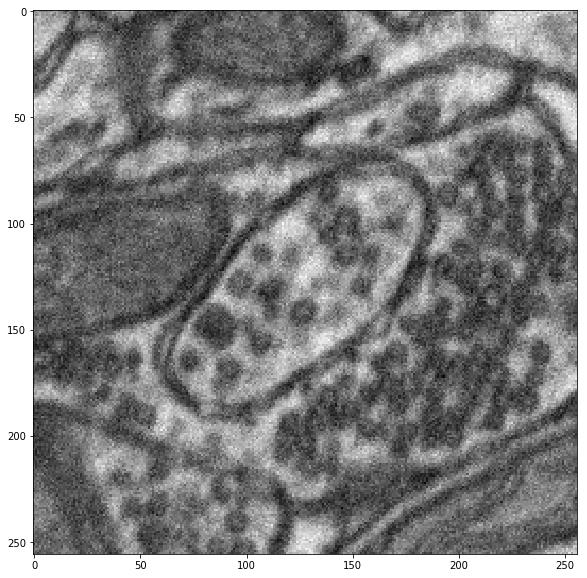

In [170]:
#Wavelet decomposition of test data outpout
[cA5F,[cH5F,cV5F,cD5F],[cH4F,cV4F,cD4F], \
 [cH3F,cV3F,cD3F],[cH2F,cV2F,cD2F],[cH1F,cV1F,cD1F]] \
= pywt.wavedec2(FCNNResults,'db2',mode='constant',level=5)

[cA5A, [cH5A,cV5A,cD5A],[cH4A,cV4A,cD4A],\
 [cH3A,cV3A,cD3A],[cH2A,cV2A,cD2A],[cH1A,cV1A,cD1A]] \
= pywt.wavedec2(atrousResults,'db2',mode='constant',level=5)

[cA5U, [cH5U,cV5U,cD5U],[cH4U,cV4U,cD4U],\
 [cH3U,cV3U,cD3U],[cH2U,cV2U,cD2U],[cH1U,cV1U,cD1U]] \
= pywt.wavedec2(UNetResults,'db2',level=5)

#Wavelet decomposition of test data outpout
[cA3F, [cH3F,cV3F,cD3F]] = pywt.wavedec2(FCNNResults,'db1',mode='constant',level=1)

[cA3A, [cH3A,cV3A,cD3A]] = pywt.wavedec2(atrousResults,'db1',mode='constant',level=1)

[cA3U, [cH3U,cV3U,cD3U]] = pywt.wavedec2(UNetResults,'db1',level=1)
[cA3o, [cH3o,cV3o,cD3o]] = pywt.wavedec2(origImg,'db1',level=1)


myWPF = waveletCoConcat(cA3F,cH3F,cV3F,cD3F,axisP=1) #pywt.coeffs_to_array([cA3F, [cH3F,cV3F,cD3F]],axes=[-2,-1])
myWPA = waveletCoConcat(cA3A,cH3A,cV3A,cD3A,1)#pywt.coeffs_to_array([cA3A, [cH3A,cV3A,cD3A]],axes=[-2,-1])
myWPU = waveletCoConcat(cA3U,cH3U,cV3U,cD3U,1)#pywt.coeffs_to_array([cA3U, [cH3U,cV3U,cD3U]],axes=[-2,-1])
myWPo = waveletCoConcat(cA3o,cH3o,cV3o,cD3o,1)#pywt.coeffs_to_array([cA3U, [cH3U,cV3U,cD3U]],axes=[-2,-1])


print(myWPF[0].shape)

if(1):
    plt.figure(figsize=(10,10))
    plt.title("Wavelet decomposition, 1 level, FCN net",fontsize=20)
    #plt.imshow((myWPF[0][0,:,:]))#,cmap='inferno')
    plt.imshow((myWPF[10,:,:]),cmap='inferno')
    plt.show()
    
    plt.figure(figsize=(10,10))
    #plt.imshow((myWPA[0][10,:,:])),cmap='gray')
    
    plt.title("Wavelet decomposition, 1 level, atrous net",fontsize=20)
    plt.imshow((myWPA[10,:,:]),cmap='inferno')
    plt.show()
    
    plt.figure(figsize=(10,10))
    #plt.imshow((myWPU[0][0,:,:]))#,cmap='gray')
    
    plt.title("Wavelet decomposition, 1 level, U-net",fontsize=20)
    plt.imshow((myWPU[10,:,:]),cmap='inferno')
    
    plt.figure(figsize=(10,10))
    #plt.imshow((myWPU[0][0,:,:]))#,cmap='gray')
    
    plt.title("Wavelet decomposition, 1 level, original test image",fontsize=20)
    plt.imshow((myWPo[10,:,:]),cmap='inferno')
    
    plt.show()
    
    plt.figure(figsize=(10,10))
    plt.imshow((FCNNResults[10,:,:]),cmap='gray')
    plt.show()
    
    plt.figure(figsize=(10,10))
    plt.imshow((atrousResults[10,:,:]),cmap='gray')
    plt.show()
    
    plt.figure(figsize=(10,10))
    plt.imshow((UNetResults[10,:,:]),cmap='gray')
    plt.show()
    
    
    plt.figure(figsize=(10,10))
    plt.imshow((origImg[10,:,:]),cmap='gray')
    plt.show()



In [188]:

def calcWaveletMetric(Img,myLevel=1,wlt='db1'):
    """function for calculate wavelet metrics"""
    #calculate the power in each layer of detail coefficients out to a given level 
    wdeco = pywt.wavedec2(Img,wlt,level=myLevel)
    wltMetric = []
    wltMetricSD = []
    mySum = 0.
    #print(wdeco[0].shape)
    for ck in range(1,myLevel+1):
        myTemp = np.abs(wdeco[ck][0])**2+np.abs(wdeco[ck][1])**2+np.abs(wdeco[ck][2])**2
        myTemp = np.sum(myTemp,axis=1)
        myTemp = np.sum(myTemp,axis=1)
        #print(myTemp.shape)
        wltMetricSD.append(np.std((myTemp)))
        wltMetric.append(np.sum(np.sum(myTemp)))
    wltMetric = np.array(wltMetric)
    wltMetric = wltMetric/  np.sum((wltMetric))
    return wltMetric, wltMetricSD

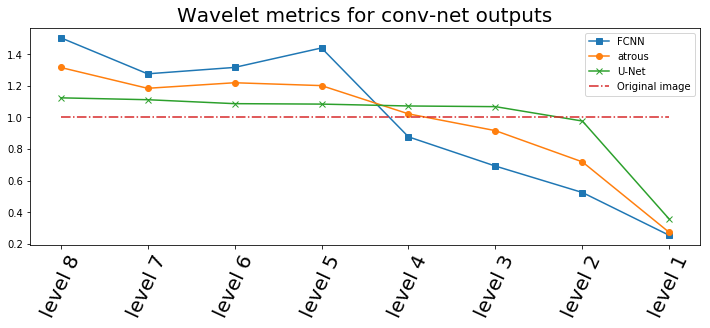

In [197]:
"""Compute the wavelet metrics and compare"""

FCNNWM, FCNSD = calcWaveletMetric(FCNNResults,myLevel=8,wlt='db1')
UNetWM, UNSD  = calcWaveletMetric(UNetResults,myLevel=8,wlt='db1')
atrousWM, ATSD = calcWaveletMetric(atrousResults,myLevel=8,wlt='db1')
origWM, OSD = calcWaveletMetric(origImg,myLevel=8,wlt='haar')

plt.figure(figsize=(12,4))
plt.title("Wavelet metrics for conv-net outputs",fontsize=20)
plt.plot(FCNNWM/origWM,'-s',label="FCNN")
#plt.errorbar([0,1,2,3,4,5,6,7],yerr=FCNSD)
plt.plot(atrousWM/origWM,'-o',label="atrous")
plt.plot(UNetWM/origWM,'-x',label="U-Net")
plt.plot(origWM/origWM,'-.',label="Original image")
plt.plot()
plt.xticks(np.arange(8),['level 8','level 7','level 6','level 5','level 4','level 3','level 2','level 1' ],rotation=65,fontsize=20)

plt.legend()
plt.show()

In [185]:
print(FCNSD, UNSD, ATSD, OSD)

[60.552856, 35.48114, 25.413876, 30.539299, 18.089746, 8.172889, 4.2745514, 2.6372962] [50.50984, 28.959852, 18.905376, 13.157414, 9.491334, 2.654666, 1.7030036, 0.5662556] [113.9971, 65.56691, 38.365044, 28.99341, 36.73602, 28.895933, 11.060541, 1.0164438] [5272490.986623246, 3030219.113876159, 1912141.862617766, 1330220.1938166346, 912105.4278642224, 335623.1438757019, 248183.95585928098, 153938.52557296574]
